## 数値計算を習得する
そのために([“私にとっての”反応拡散系数値シミュレーション入門基礎編](http://mmc01.es.hokudai.ac.jp/58))を使う. ここにはその演習をやる. 

In [148]:
import math
import numpy as np
import matplotlib.pyplot as plt



#### 例題1 ロジスティック方程式

$$
\begin{align}
\frac{du}{dt} &= au(1-u),\\
u(0) &= u_0
\end{align}
$$

ただし, aは正の定数

1.  $u_0 > 0$の初期値に対してEuler法や法やRunge-Kutta法で数値計算しなさい. 得られた解を(u,t)平面でグラフ表示しなさい. 

以下に修正Euler法(通常版)を示す.
$$
\begin{align}
u_0 &= u(t_0), \\
k &= u_n + \frac{\Delta t}{2}f(t_n, u_n),\\
u_{n+1} &= u_n +\Delta t f(t_n + \frac{\Delta t}{2}, k).
\end{align}
$$

##### 関数の設定

In [149]:
def logistic(a, x):
    return a*x*(1-x)

##### 時間の設定

In [161]:
t = 0.0
dt = 0.01
endTime = 10.0
steps = endTime/dt

##### パラメータの設定

In [162]:
a = 1 #仮にね

##### 初期値の設定

In [163]:
u_0 = 0.2
u = u_0

##### グラフ用の配列の作成

In [164]:
t_array = np.arange(0, endTime, dt)
u_array = np.array([])

##### Euler法での数値計算

In [143]:


for i in range(int(steps)):
    t+= dt #時間を進める
    k = u + dt/2*logistic(a, u) 
    u = u + dt*logistic(a, k) 
    u_array = np.append(u_array, u)


   

##### グラフの描画

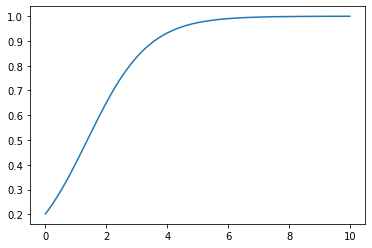

In [144]:
plt.plot(t_array, u_array) 

次に4次のRungeーKutta法を以下に示す. 

$$
\begin{align}
u_0 &= u(t_0),\\
k_1 &= f(t_n, u_n),\\
k_2 &=f(t_n + \frac{1}{2}\Delta t, u_n + \frac{1}{2}\Delta k_1),\\
k_3 &=f(t_n + \frac{1}{2}\Delta t, u_n + \frac{1}{2}\Delta k_2),\\
k_4 &=f(t_n + \frac{1}{2}\Delta t, u_n + \frac{1}{2}\Delta k_3),\\
u_{n+1} &= u_n + \frac{\Delta t}{6}(k_1 + 2k_2 + 2k_3 +k_4).
\end{align}
$$

##### 4次のRungeーKutta法での数値計算

In [165]:
for i in range(int(steps)):
    t += dt #時間を進める
    k1 = logistic(a, u)
    k2 = logistic(a, u + dt/2*k1)
    k3 = logistic(a, u + dt/2*k2)
    k4 = logistic(a, u + dt/2*k3)
    u = u + dt/6*(k1 + 2*k2 + 2*k3 + k4)
    u_array = np.append(u_array, u)

    

#### グラフの描画

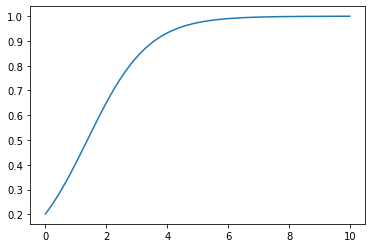

In [166]:
plt.plot(t_array, u_array)

2. Euler法で数値計算したとき，∆t の大きさを変化させて解を求めなさい．

In [ ]:
t = 0.0
dt = 0.01
endTime = 10.0
steps = endTime/dt

a = 1 #仮にね

u_0 = 0.2
u = u_0



